# ACTION DETECTION

## Import and Install Dependencies

In [25]:
# Import and install dependencies

import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [26]:
print("MediaPipe version:", mp.__version__)
print("Tensor version:", tf.__version__)

MediaPipe version: 0.10.10
Tensor version: 2.10.0


## Keypoints using MP Holistic

In [27]:
#1

mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities 

In [28]:
#2

def mediapipe_detection (image, model):    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)      # Convert the image from BGR to RGB color space
    image.flags.writeable = False                       # Set the writeable flag of the image to False to prevent modification   
    results = model.process(image)                      # Process the image using the provided model (presumably the holistic model)   
    image.flags.writeable = True                        # Set the writeable flag of the image back to True for further processing   
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)      # Convert the image back from RGB to BGR color space

    return image, results

In [29]:
# 3: trying open webcam

cap = cv2.VideoCapture(0)

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        # draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [30]:
# 4: drawing all the landmark (face, pose, hands)

def draw_styled_landmarks(image, results):
    # # Draw Face Connections
    # mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
    #                           # we can use -- FACEMESH_TESSELATION -- or you can also use ---- FACEMESH_CONTOURS --- If you want just the outlines of the face
    #                           mp_drawing.DrawingSpec(color = (80, 110, 10), thickness = 1, circle_radius = 1),
    #                           mp_drawing.DrawingSpec(color = (80, 256, 121), thickness =1, circle_radius =1)
    #                           )

    # Draw Pose Connection      
    # mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
    #                           mp_drawing.DrawingSpec(color = (80, 22, 10), thickness = 2, circle_radius = 4),
    #                           mp_drawing.DrawingSpec(color = (80, 44, 121), thickness =2, circle_radius =2)
    #                           )

    # Draw left hand Connection
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color = (121, 22, 76), thickness = 2, circle_radius = 4),
                              mp_drawing.DrawingSpec(color = (121, 44, 250), thickness =2, circle_radius =2)
                              ) 
    
    # Draw right hand Connection   
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                              mp_drawing.DrawingSpec(color = (245, 117, 66), thickness = 1, circle_radius = 4),
                              mp_drawing.DrawingSpec(color = (245, 66, 230), thickness =1, circle_radius =2)
                              )   

In [ ]:
cv2.cvtColor??

In [9]:
# 5:  open webcam + using landmark

# Keypoint using MP Holistic 

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence= 0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detection
        image, results = mediapipe_detection(frame, holistic)

        # Draw Landmarks
        draw_styled_landmarks (image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully 
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()


# To stop the camera popup, just press q in keyboard. 


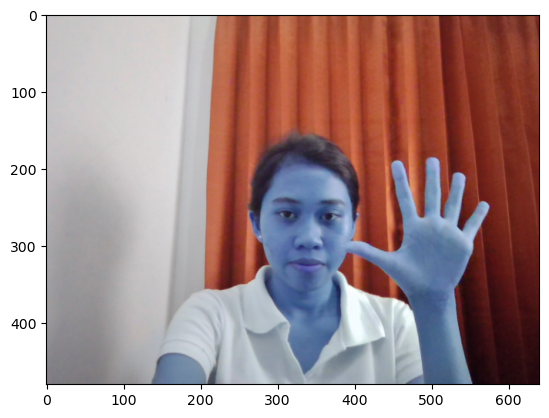

In [10]:
plt.imshow(frame)

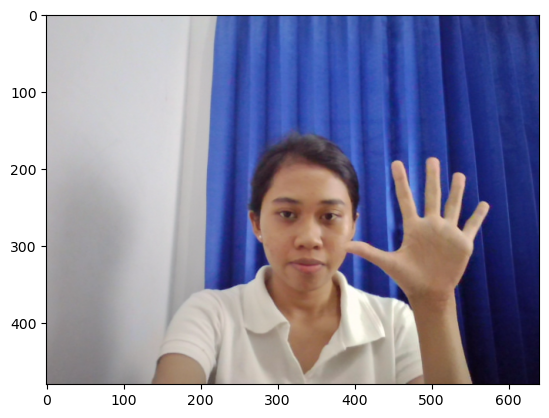

In [11]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

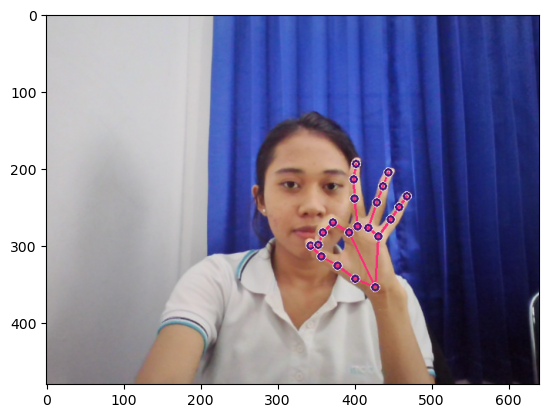

In [13]:
draw_styled_landmarks(frame, results)
plt.imshow(cv2.cvtColor(frame,  cv2.COLOR_BGR2RGB))

## Extract Keypoints for Collection

In [14]:
results.pose_landmarks.landmark[0].visibility

0.999998152256012

In [31]:
# 6: extracting all the landmark keypoints

# For pose landmarks: x, y, z coordinates and visibility (if available)
# For face landmarks: x, y, z coordinates
# For left and right hand landmarks: x, y, z coordinates
# If no landmarks are detected, zero-filled arrays are created with appropriate lengths

def extract_keypoints(results):
    # pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    #  face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([lh, rh])

In [11]:
extract_keypoints(results).shape

(126,)

In [12]:
result_test = extract_keypoints(results)

In [19]:
result_test

array([ 8.39411676e-01,  7.03875422e-01,  4.70418939e-07,  8.02991092e-01,
        6.88887000e-01, -3.08644753e-02,  7.70653605e-01,  6.63012087e-01,
       -5.69946952e-02,  7.63590395e-01,  6.55656934e-01, -8.22349340e-02,
        7.72133708e-01,  6.55067444e-01, -1.05985060e-01,  7.87997186e-01,
        5.00813305e-01, -3.64676230e-02,  7.69090056e-01,  4.26420540e-01,
       -7.15901256e-02,  7.60314047e-01,  4.01409894e-01, -9.80728790e-02,
        7.52490819e-01,  4.14700747e-01, -1.11194760e-01,  8.40646327e-01,
        4.92392242e-01, -3.91151421e-02,  8.56724262e-01,  4.11391556e-01,
       -6.49825260e-02,  8.60750794e-01,  3.65581155e-01, -8.34915340e-02,
        8.55985403e-01,  3.61584604e-01, -9.31367353e-02,  8.85072410e-01,
        5.17307818e-01, -4.68947999e-02,  9.08468962e-01,  4.44368631e-01,
       -7.07134306e-02,  9.14879560e-01,  4.02786255e-01, -8.36949199e-02,
        9.05619264e-01,  3.89628083e-01, -8.88135135e-02,  9.23260331e-01,
        5.60981929e-01, -

In [42]:
np.save('0', result_test)

In [43]:
np.load('0.npy')

array([ 5.33310473e-01,  5.96129119e-01, -1.24574161e+00,  9.99175906e-01,
        5.60023189e-01,  5.36531985e-01, -1.20047927e+00,  9.98467803e-01,
        5.76793849e-01,  5.36636293e-01, -1.20061040e+00,  9.98470306e-01,
        5.94409883e-01,  5.37736595e-01, -1.20089960e+00,  9.98199224e-01,
        5.10219395e-01,  5.32782137e-01, -1.21623135e+00,  9.98748541e-01,
        4.90690172e-01,  5.30571461e-01, -1.21570635e+00,  9.98942673e-01,
        4.69425768e-01,  5.29974341e-01, -1.21610236e+00,  9.98908937e-01,
        6.13272250e-01,  5.55631101e-01, -7.75764942e-01,  9.98097539e-01,
        4.32234913e-01,  5.43701172e-01, -8.30650330e-01,  9.99176204e-01,
        5.56368947e-01,  6.65182531e-01, -1.07491219e+00,  9.99263406e-01,
        4.92830127e-01,  6.65807128e-01, -1.09092927e+00,  9.99538422e-01,
        7.12555110e-01,  8.40852857e-01, -4.34579194e-01,  9.96247351e-01,
        2.89305955e-01,  8.39341342e-01, -5.53820431e-01,  9.98017073e-01,
        8.22359920e-01,  

## Setup Folders for Collection

In [13]:
# 7 Creating datasets folder (from 0- end)

import os
import numpy as np

# Path for exported data, numpy arrays
DATA_PATH = 'Data_arr_50s'

# Path for exported images
IMAGE_DATA_PATH = 'Data_img_50s'

# Actions that we try to detect
actions = np.array(['T'])  # Assuming 'perkenalkan' is the correct word

# Thirty videos worth of data
no_sequences = 100


# Videos are going to be 30 frames in length
sequence_length = 30

In [14]:
# 8 Loop through each action to create directories for both data and images
for action in actions:
    # Paths for keypoints data and images
    action_data_path = os.path.join(DATA_PATH, action)
    action_image_path = os.path.join(IMAGE_DATA_PATH, action)

    # Ensure directories exist for both keypoints and images
    os.makedirs(action_data_path, exist_ok=True)
    os.makedirs(action_image_path, exist_ok=True)

    # Instead of checking existing directories, we reset sequence numbering for each action
    for sequence in range(no_sequences):  # Starts from 0 and goes up to no_sequences - 1
        new_data_dir = os.path.join(action_data_path, str(sequence))
        new_image_dir = os.path.join(action_image_path, str(sequence))
        
        os.makedirs(new_data_dir, exist_ok=True)
        os.makedirs(new_image_dir, exist_ok=True)

In [ ]:
# 9: membuat folder dataset (dari 0 - mau berhenti di folder apa)

import os
import numpy as np

# Path for exported data, numpy arrays
DATA_PATH = 'Data_arr_50s'

# Path for exported images
IMAGE_DATA_PATH = 'Data_img_50s'

# Actions that we try to detect
actions = np.array(['O'])

# Define the range for sequence numbering
start_folder = 0
end_folder = 25

# Videos are going to be 30 frames in length
# sequence_length = 30

# Loop through each action to create directories for both data and images
for action in actions:
    # Paths for keypoints data and images
    action_data_path = os.path.join(DATA_PATH, action)
    action_image_path = os.path.join(IMAGE_DATA_PATH, action)

    # Ensure directories exist for both keypoints and images
    os.makedirs(action_data_path, exist_ok=True)
    os.makedirs(action_image_path, exist_ok=True)

    # Create directories starting from start_folder to end_folder - 1
    for sequence in range(start_folder, end_folder):
        new_data_dir = os.path.join(action_data_path, str(sequence))
        new_image_dir = os.path.join(action_image_path, str(sequence))
        
        os.makedirs(new_data_dir, exist_ok=True)
        os.makedirs(new_image_dir, exist_ok=True)


## Collect Keypoints Values for Training and Testing

In [18]:
# 10: Set base directories for keypoints and images (sesuain sama nama folder masing")

# Path for exported data, numpy arrays
DATA_PATH = 'Data_arr_50s'

# Path for exported images
IMAGE_DATA_PATH = 'Data_img_50s'

actions = ['T']
no_sequences = 25  # Number of sequences per action
sequence_length = 30  # Number of frames per sequence
start_sequence = 25  # Starting sequence number

In [16]:
# 9 setup camera + trying

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [19]:
import cv2
import os
import numpy as np
import mediapipe as mp

# Inisialisasi webcam capture
cap = cv2.VideoCapture(0)

# Inisialisasi model MediaPipe Holistic dengan threshold kepercayaan
mp_holistic = mp.solutions.holistic
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():  # Terus menangkap frame hingga ditutup secara manual
        
        # Countdown sebelum pengambilan gambar dimulai
        for i in range(3, 0, -1):
            ret, frame = cap.read()
            cv2.putText(frame, f'Starting in {i}', (200, 200),
                        cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 4, cv2.LINE_AA)
            cv2.imshow('OpenCV Feed', frame)
            cv2.waitKey(1000)  # Tunggu selama 1 detik

        # Loop melalui tindakan
        for action in actions:
            # Loop melalui urutan
            for sequence in range(start_sequence, start_sequence + no_sequences):
                # Loop melalui frame dalam setiap urutan
                for frame_num in range(sequence_length):
                    # Baca frame dari feed webcam
                    ret, frame = cap.read()

                    # Lakukan deteksi menggunakan model Holistic
                    image, results = mediapipe_detection(frame, holistic)

                    # Gambar landmarks pada frame
                    draw_styled_landmarks(image, results)

                    # Tampilkan pesan status
                    if frame_num == 0:
                        cv2.putText(image, 'STARTING_COLLECTION', (120, 200),
                                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence),
                                    (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 4, cv2.LINE_AA)
                        
                        # Tampilkan ke layar
                        cv2.imshow('OpenCV Feed', image)
                        cv2.waitKey(3000)  # Tunggu selama 3 detik

                    else:
                        cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence),
                                    (15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)

                        # Tampilkan frame dengan landmarks
                        cv2.imshow('OpenCV Feed', image)

                    # Ekstraksi keypoints dan simpan ke file NumPy array
                    keypoints = extract_keypoints(results)

                    npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                    np.save(npy_path, keypoints)

                    # Simpan gambar
                    img_path = os.path.join(IMAGE_DATA_PATH, action, str(sequence), f"{frame_num}.jpg")
                    cv2.imwrite(img_path, image)

                    # Break out of the loop if 'q' is pressed
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        break

                # Tampilkan pesan jeda sebelum mulai urutan video berikutnya
                if sequence < start_sequence + no_sequences - 1:
                    cv2.putText(image, 'WAITING 3 SECONDS', (120, 200),
                                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 4, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(4000)  # Tunggu selama 3 detik sebelum memulai urutan berikutnya

        # Lepaskan sumber daya webcam dan tutup jendela OpenCV
        cap.release()
        cv2.destroyAllWindows()


In [24]:
cap.release()
cv2.destroyAllWindows()

# Preprocessing Data and Create Labels and Feature

In [32]:
# 11: labelling

DATA_PATH = 'Data_arr_50s'

actions = np.array(['A','B', 'C', 'D', 'E', 'F', 'G', 'H'])
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7}

In [33]:
sequences, labels = [], []

for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            try:
                # Load the numpy file for each frame in the sequence
                res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
                window.append(res)
            except FileNotFoundError:
                # If file not found, skip this sequence
                continue
        # Ensure the sequence length matches the expected length (sequence_length)
        if len(window) == sequence_length:
            sequences.append(window)
            labels.append(label_map[action])
        else:
            # Print message if sequence length doesn't match
            print(f"Ignoring sequence {sequence} for action {action} due to mismatched length")

# After the loop finishes, proceed with training


NameError: name 'no_sequences' is not defined

In [18]:
X = np.array(sequences)
y = to_categorical(labels).astype(int)

NameError: name 'sequences' is not defined

In [64]:
X.shape

(800, 30, 126)

In [53]:
np.array(labels).shape

(400,)

In [54]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

In [56]:
y_test.shape

(20, 16)

# Build and Train LSTM Neural Network

In [34]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [17]:
# Define the custom callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        if (logs.get('categorical_accuracy') > 0.98) and (logs.get('loss') < 0.10):
            print("\nCategorical accuracy is higher than 0.98 and loss is lower than 0.10, stopping training!")
            self.model.stop_training = True

# Instantiate the custom callback
custom_callback = myCallback()

# Set up the TensorBoard callback
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

# Combine both callbacks
callbacks = [custom_callback, tb_callback]

In [35]:
model = Sequential([
    LSTM(64, return_sequences = True, activation = 'relu', input_shape = (30, 126)),
    LSTM(128, return_sequences = True, activation = 'relu'),
    LSTM(64, return_sequences = False, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(actions.shape[0], activation ='softmax')
])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            48896     
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 8)                 264       
                                                                 
Total params: 203,624
Trainable params: 203,624
Non-tr

In [22]:
import tensorflow as tf
from tensorflow.keras.layers import Input, RNN, GRU, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import regularizers


# Arsitektur 3 (pake GRU)
model = Sequential()
model.add(GRU(128, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(GRU(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(actions.shape[0], activation='softmax'))

In [71]:
# from keras.models import Sequential
# from keras.layers import GRU, Dense, Dropout


# model = Sequential()
# model.add(GRU(64, return_sequences=True, activation='relu', input_shape=(30,258)))
# model.add(Dropout(.3))
# model.add(GRU(128, return_sequences=True, activation='relu'))
# model.add(Dropout(.3))
# model.add(GRU(64, return_sequences=False, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dropout(.3))
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(.3))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(actions.shape[0], activation='softmax'))

In [ ]:
# from keras.models import Sequential
# from keras.layers import GRU, Dense, Dropout
# from keras import regularizers

# # Model GRU
# model = Sequential()
# model.add(GRU(128, return_sequences=True, activation='relu'))
# model.add(Dropout(0.2))
# model.add(GRU(64, return_sequences=False, activation='relu'))
# model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
# model.add(Dropout(0.2))
# model.add(Dense(signs.shape[0], activation='softmax'))


In [16]:
model.compile(
    optimizer = 'Adam',
    loss = 'categorical_crossentropy',
    metrics = ['categorical_accuracy']
)

In [77]:
model.fit(X_train, y_train, epochs = 800, callbacks = [callbacks])

Epoch 1/800
12/12 [==============================] - 3s 29ms/step - loss: 3.7774 - categorical_accuracy: 0.0816
Epoch 2/800
12/12 [==============================] - 0s 30ms/step - loss: 3.5463 - categorical_accuracy: 0.1447
Epoch 3/800
12/12 [==============================] - 0s 32ms/step - loss: 3.3574 - categorical_accuracy: 0.1421
Epoch 4/800
12/12 [==============================] - 0s 30ms/step - loss: 3.1349 - categorical_accuracy: 0.1789
Epoch 5/800
12/12 [==============================] - 0s 30ms/step - loss: 3.0848 - categorical_accuracy: 0.1395
Epoch 6/800
12/12 [==============================] - 0s 30ms/step - loss: 2.9358 - categorical_accuracy: 0.1447
Epoch 7/800
12/12 [==============================] - 0s 30ms/step - loss: 2.7337 - categorical_accuracy: 0.2211
Epoch 8/800
12/12 [==============================] - 0s 31ms/step - loss: 2.6600 - categorical_accuracy: 0.2105
Epoch 9/800
12/12 [==============================] - 0s 30ms/step - loss: 2.5999 - categorical_accuracy:

## Make Predictions

In [23]:
res = model.predict(X_test)

NameError: name 'X_test' is not defined

In [79]:
model.save('model_ABCDEFGHIJKLOPQV_GRU_ac09_ls017_s100.h5')

In [36]:
model.load_weights('model_ABCDEFGH_lstm_ac09_ls017_s100.h5')

# Evaluation using Confusion Matrix and Accuracy

In [81]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [45]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 28ms/step


In [46]:
ytrue = np.argmax(y_test, axis = 1).tolist()
yhat = np.argmax(yhat, axis = 1).tolist()

In [47]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[13,  0],
        [ 0,  2]],

       [[12,  0],
        [ 1,  2]],

       [[14,  0],
        [ 0,  1]],

       [[13,  0],
        [ 0,  2]],

       [[12,  0],
        [ 0,  3]],

       [[12,  1],
        [ 0,  2]],

       [[14,  0],
        [ 0,  1]],

       [[14,  0],
        [ 0,  1]]], dtype=int64)

In [82]:
accuracy_score(ytrue, yhat)

0.9333333333333333

In [ ]:
#belum benar

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(ytrue, yhat)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=actions, yticklabels=actions)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Test in Real Time

In [86]:
from scipy import stats

colors = [(245,117,16), (117,245,16), (16,117,245), (245,117,16), (117,245,16), (117,245,16), (117,245,16), (117,245,16),  (117,245,16), (117,245,16),  (117,245,16), (117,245,16),  (117,245,16), (117,245,16), (117,245,16), (117,245,16)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [ ]:
# Testing Model (Without Batching)
sequence = []
sentence = []
predictions = []
threshold = 0.9

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)

        cv2.putText(image, ' '.join(sentence), (3,30), 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [94]:
# Testing Model (With Batching)

import cv2
import numpy as np
import mediapipe as mp
import time

# Initialize variables
sequence = []
sentence = []
predictions = []
threshold = 0.95
state = 'countdown'
countdown_time = 3
display_time = 2
start_time = time.time()

cap = cv2.VideoCapture(0)
mp_holistic = mp.solutions.holistic

# Helper function to show countdown
def show_countdown(image, seconds_left):
    cv2.putText(image, f'Memulai prediksi dalam {seconds_left}..', (100, 250), 
                cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 4, cv2.LINE_AA)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        # Read frame
        ret, frame = cap.read()

        current_time = time.time()
        
        if state == 'countdown':
            seconds_left = countdown_time - int(current_time - start_time)
            image = frame.copy()
            show_countdown(image, seconds_left)
            
            if seconds_left <= 0:
                state = 'collecting'
                start_time = current_time
                sequence = []
        
        elif state == 'collecting':
            # Perform detection
            image, results = mediapipe_detection(frame, holistic)
            draw_styled_landmarks(image, results)
            
            # Prediction logic
            keypoints = extract_keypoints(results)
            sequence.append(keypoints)
            
            if len(sequence) == 30:
                res = model.predict(np.expand_dims(sequence, axis=0))[0]
                print(actions[np.argmax(res)])
                predictions.append(np.argmax(res))

                
                # Update sentence based on prediction
                if np.unique(predictions[-30:])[0] == np.argmax(res):
                    if res[np.argmax(res)] > threshold:
                        if len(sentence) > 0:
                            if actions[np.argmax(res)] != sentence[-1]:
                                sentence.append(actions[np.argmax(res)])
                        else:
                            sentence.append(actions[np.argmax(res)])
                
                if len(sentence) > 5:
                    sentence = sentence[-5:]

                state = 'displaying'
                start_time = current_time
        
        elif state == 'displaying':
            # Display the prediction
            if len(sentence) > 0:
                cv2.putText(image, ' '.join(sentence), (3, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
            if (current_time - start_time) > display_time:
                state = 'countdown'
                start_time = current_time

        # Show the frame
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

1/1 [==============================] - 0s 20ms/step
K
1/1 [==============================] - 0s 23ms/step
A
1/1 [==============================] - 0s 23ms/step
A
1/1 [==============================] - 0s 25ms/step
A
1/1 [==============================] - 0s 28ms/step
A
1/1 [==============================] - 0s 27ms/step
P
1/1 [==============================] - 0s 25ms/step
K
1/1 [==============================] - 0s 23ms/step
P
1/1 [==============================] - 0s 22ms/step
K
1/1 [==============================] - 0s 23ms/step
L
1/1 [==============================] - 0s 23ms/step
O
1/1 [==============================] - 0s 21ms/step
O
1/1 [==============================] - 0s 26ms/step
O
1/1 [==============================] - 0s 22ms/step
L
1/1 [==============================] - 0s 22ms/step
L
1/1 [==============================] - 0s 21ms/step
L
1/1 [==============================] - 0s 25ms/step
K
1/1 [==============================] - 0s 21ms/step
K
1/1 [=======================

: 